# Andrey Martynenko
# Deep Learning for Transportation Image Recognition: A Custom CNN vs. VGG16 Approach
# Deep Learning Individual Exercise

In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Define dataset path and image parameters
data_path = "/Users/macbook_pro/Desktop/DL Individual Project AM/Dataset"

image_size = (128, 128)  # Resize all images to 128x128 for Custom CNN
batch_size = 32


In [19]:
# Prepare the ImageDataGenerators for training and testing
# Rescaling normalizes the image pixel values from [0–255] to [0–1]

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training images from 'train' subfolders
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test images from 'test' subfolders
test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Needed for confusion matrix
)


Found 3000 images belonging to 3 classes.
Found 582 images belonging to 3 classes.


In [21]:
# Import TensorFlow and necessary Keras layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple custom CNN model
custom_model = Sequential()

# First Convolutional Block
custom_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
custom_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
custom_model.add(Conv2D(128, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps and pass through Dense layers
custom_model.add(Flatten())
custom_model.add(Dense(128, activation='relu'))
custom_model.add(Dropout(0.5))  # Prevent overfitting
custom_model.add(Dense(3, activation='softmax'))  # 3 output classes


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model with Adam optimizer and categorical crossentropy loss
custom_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [25]:
# Train the custom CNN model
history_custom = custom_model.fit(
    train_generator,
    epochs=20,  # Keep small for demo
    validation_data=test_generator
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.5829 - loss: 0.9286 - val_accuracy: 0.7371 - val_loss: 0.6157
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.8350 - loss: 0.4599 - val_accuracy: 0.8522 - val_loss: 0.3964
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.8836 - loss: 0.3049 - val_accuracy: 0.8660 - val_loss: 0.3543
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8988 - loss: 0.2473 - val_accuracy: 0.9021 - val_loss: 0.2505
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.9214 - loss: 0.2172 - val_accuracy: 0.9003 - val_loss: 0.2554
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9417 - loss: 0.1719 - val_accuracy: 0.9227 - val_loss: 0.2066
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9618 - loss: 0.1180 - val_accuracy: 0.8969 - val_loss: 0.2676
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9625 - loss: 0.1036 - val_accu

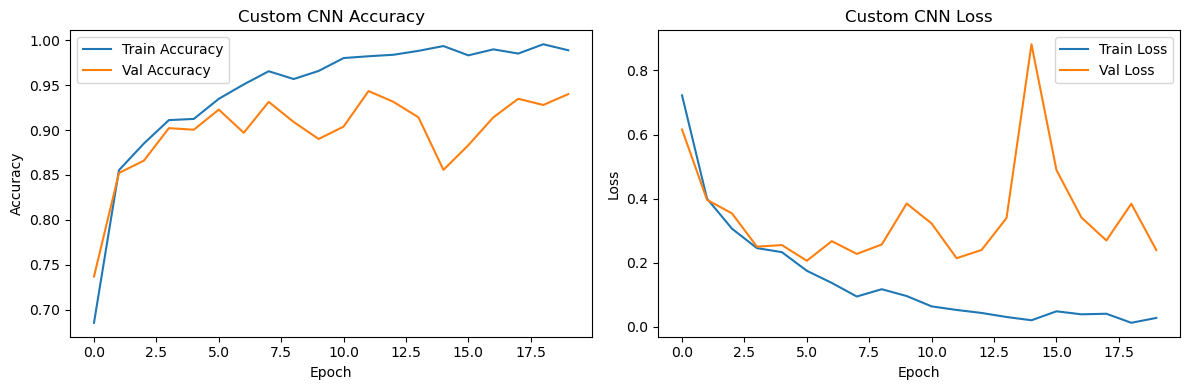

In [27]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_custom.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Val Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Train Loss')
plt.plot(history_custom.history['val_loss'], label='Val Loss')
plt.title('Custom CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step


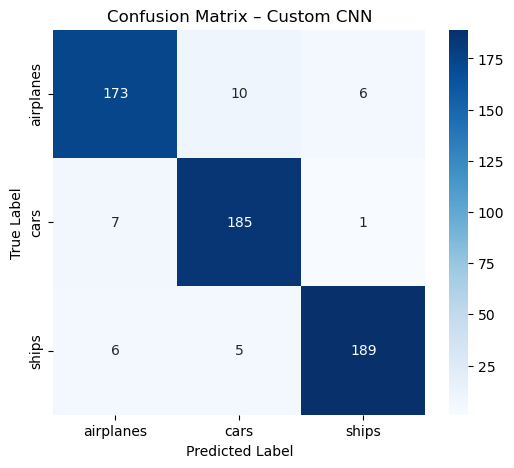

Classification Report – Custom CNN
              precision    recall  f1-score   support

   airplanes       0.93      0.92      0.92       189
        cars       0.93      0.96      0.94       193
       ships       0.96      0.94      0.95       200

    accuracy                           0.94       582
   macro avg       0.94      0.94      0.94       582
weighted avg       0.94      0.94      0.94       582



In [29]:
# Predict labels on test set
Y_pred_custom = custom_model.predict(test_generator)
y_pred_custom = np.argmax(Y_pred_custom, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
cm_custom = confusion_matrix(y_true, y_pred_custom)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix – Custom CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print("Classification Report – Custom CNN")
print(classification_report(y_true, y_pred_custom, target_names=class_names))


In [31]:
# Import VGG16 and additional required layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [33]:
# Load VGG16 without the top classification layers
# We use pretrained weights from ImageNet
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers so we don't retrain the pretrained weights
for layer in base_vgg.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [35]:
# Add a custom head for our 3-class classification task
x = base_vgg.output
x = GlobalAveragePooling2D()(x)           # Reduce spatial dimensions
x = Dense(128, activation='relu')(x)      # Fully connected layer
x = Dropout(0.5)(x)                        # Dropout for regularization
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Combine base VGG16 model with the custom head
vgg_model = Model(inputs=base_vgg.input, outputs=predictions)


In [37]:
# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [41]:
# Train the VGG16 model
history_vgg = vgg_model.fit(
    train_generator,
    epochs=20,  # Same number as the custom CNN for fair comparison
    validation_data=test_generator
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 457ms/step - accuracy: 0.7998 - loss: 0.5907 - val_accuracy: 0.9364 - val_loss: 0.3888
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 450ms/step - accuracy: 0.8706 - loss: 0.4592 - val_accuracy: 0.9450 - val_loss: 0.3147
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.8898 - loss: 0.3856 - val_accuracy: 0.9502 - val_loss: 0.2637
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 445ms/step - accuracy: 0.8991 - loss: 0.3398 - val_accuracy: 0.9519 - val_loss: 0.2274
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.9188 - loss: 0.2832 - val_accuracy: 0.9553 - val_loss: 0.2035
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.9262 - loss: 0.2625 - val_accuracy: 0.9570 - val_loss: 0.1850
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.9325 - loss: 0.2472 - val_accuracy: 0.9588 - val_loss: 0.1705
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.9471 - loss: 0.2115 - val_accu

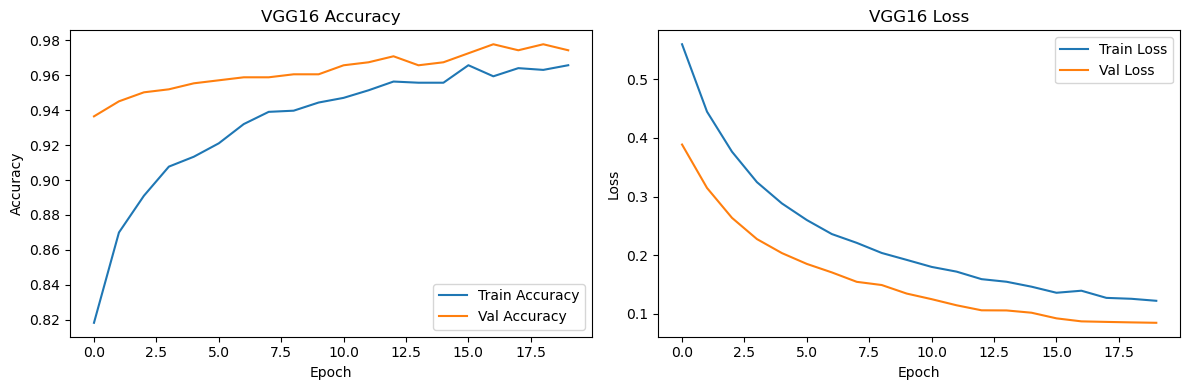

In [43]:
# Plot training and validation accuracy and loss for VGG16
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step


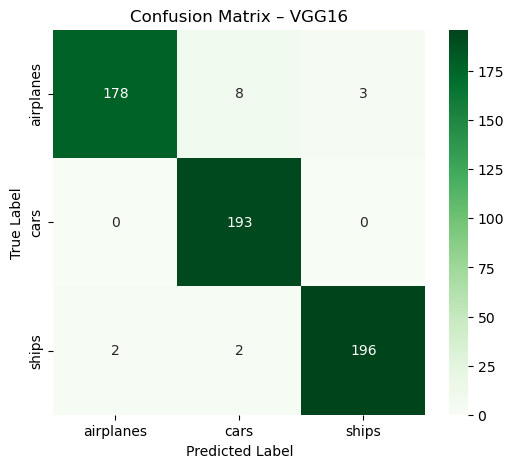

Classification Report – VGG16
              precision    recall  f1-score   support

   airplanes       0.99      0.94      0.96       189
        cars       0.95      1.00      0.97       193
       ships       0.98      0.98      0.98       200

    accuracy                           0.97       582
   macro avg       0.97      0.97      0.97       582
weighted avg       0.97      0.97      0.97       582



In [45]:
# Predict on the test data
Y_pred_vgg = vgg_model.predict(test_generator)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)

# True labels
y_true = test_generator.classes

# Confusion matrix
cm_vgg = confusion_matrix(y_true, y_pred_vgg)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix – VGG16")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("Classification Report – VGG16")
print(classification_report(y_true, y_pred_vgg, target_names=class_names))


In [47]:
# Print final test accuracy for both models

custom_acc = history_custom.history['val_accuracy'][-1]
vgg_acc = history_vgg.history['val_accuracy'][-1]

print(f"Final Test Accuracy – Custom CNN: {custom_acc:.4f}")
print(f"Final Test Accuracy – VGG16: {vgg_acc:.4f}")


Final Test Accuracy – Custom CNN: 0.9399
Final Test Accuracy – VGG16: 0.9742


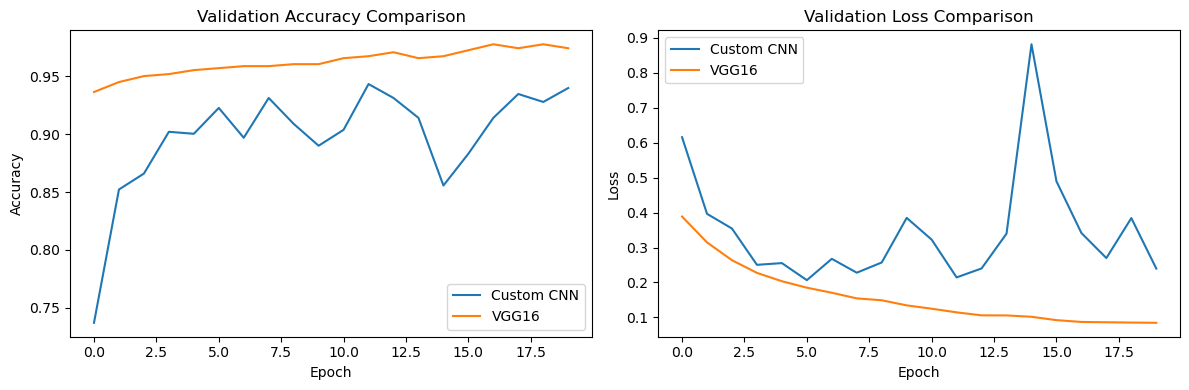

In [49]:
# Plot combined accuracy curves
plt.figure(figsize=(12, 4))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_custom.history['val_accuracy'], label='Custom CNN')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_custom.history['val_loss'], label='Custom CNN')
plt.plot(history_vgg.history['val_loss'], label='VGG16')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


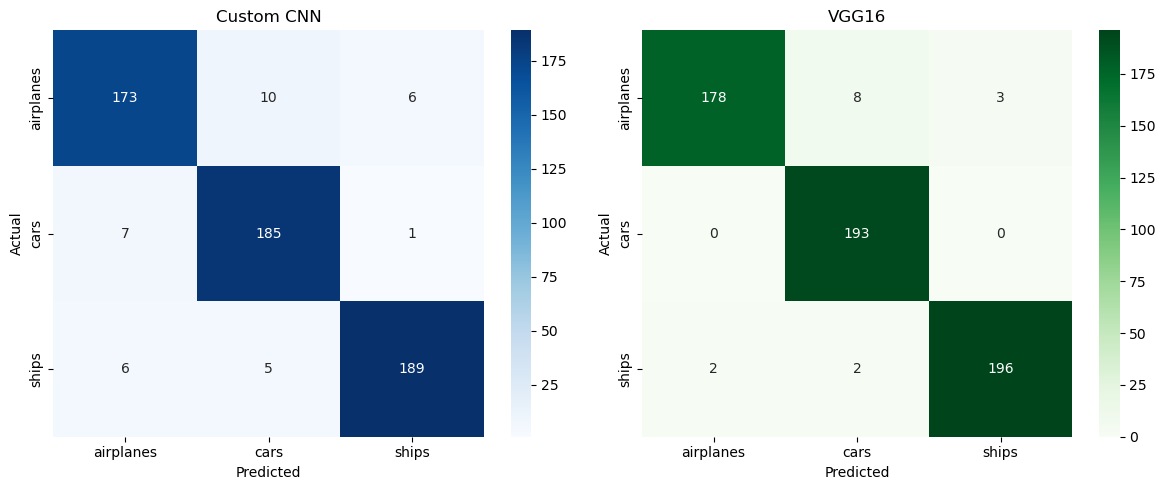

In [51]:
# Side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom CNN
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Custom CNN")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# VGG16
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("VGG16")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
